# M51

In [1]:
# Preamble 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basics
import numpy as np
import astropy.io.fits as pyfits

# Matplotlib
import matplotlib
import matplotlib.pyplot as plt

# Adjust fonts
params = {
    'font.family'        : 'serif',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

# Bias

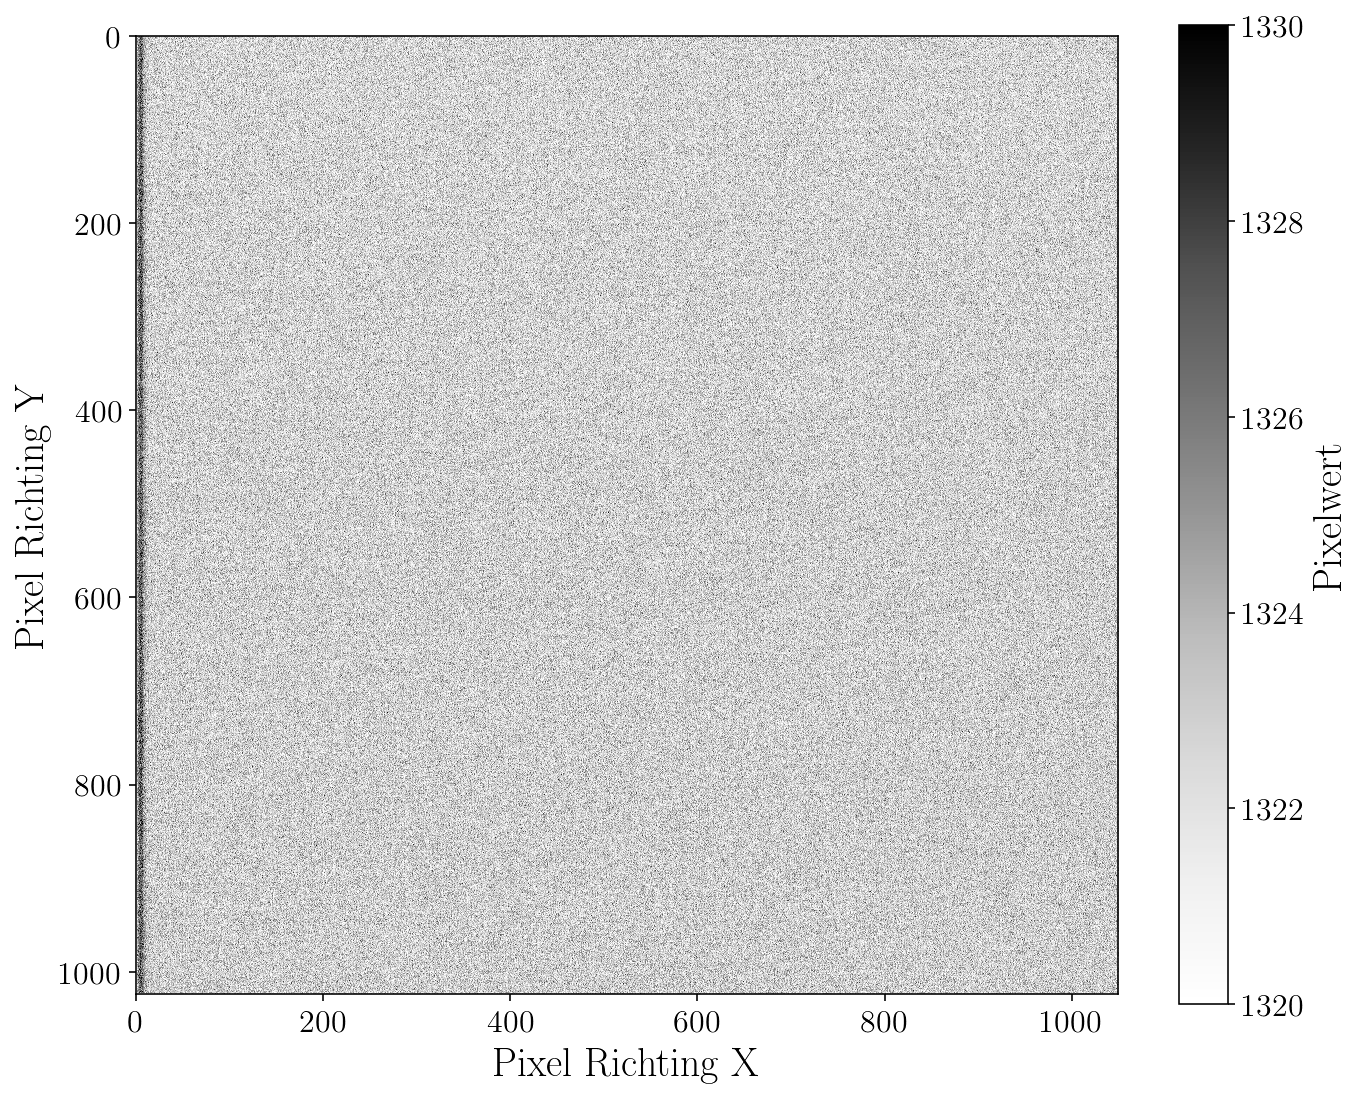

In [2]:
bias = np.flipud(pyfits.getdata('bias/bias.fits'))
plt.figure(figsize=(11,9))
s1 = plt.imshow(bias,vmin=1320,vmax=1330,cmap='Greys')
plt.xlabel('Pixel Richting X')
plt.ylabel('Pixel Richting Y')
c1 = plt.colorbar(s1);
c1.set_label('Pixelwert')

# Flatfield

In [47]:
flat_V_raw = np.median([np.flipud(pyfits.getdata('flats/flat_V_000'+str(nr)+'.fits')) for nr in range(5)],axis=0)
flat_V = (flat_V_raw - bias)
flat_V = flat_V/np.median(flat_V)
flat_V[flat_V<=0] = 0.001

flat_R_raw = np.median([np.flipud(pyfits.getdata('flats/flat_R_000'+str(nr)+'.fits')) for nr in range(5)],axis=0)
flat_R = flat_R_raw - bias
flat_R = flat_R/np.median(flat_R)
flat_R[flat_R<=0] = 0.001

flat_I_raw = np.median([np.flipud(pyfits.getdata('flats/flat_I_000'+str(nr)+'.fits')) for nr in range(5)],axis=0)
flat_I = flat_I_raw - bias
flat_I = flat_I/np.median(flat_I)
flat_I[flat_I<=0] = 0.001

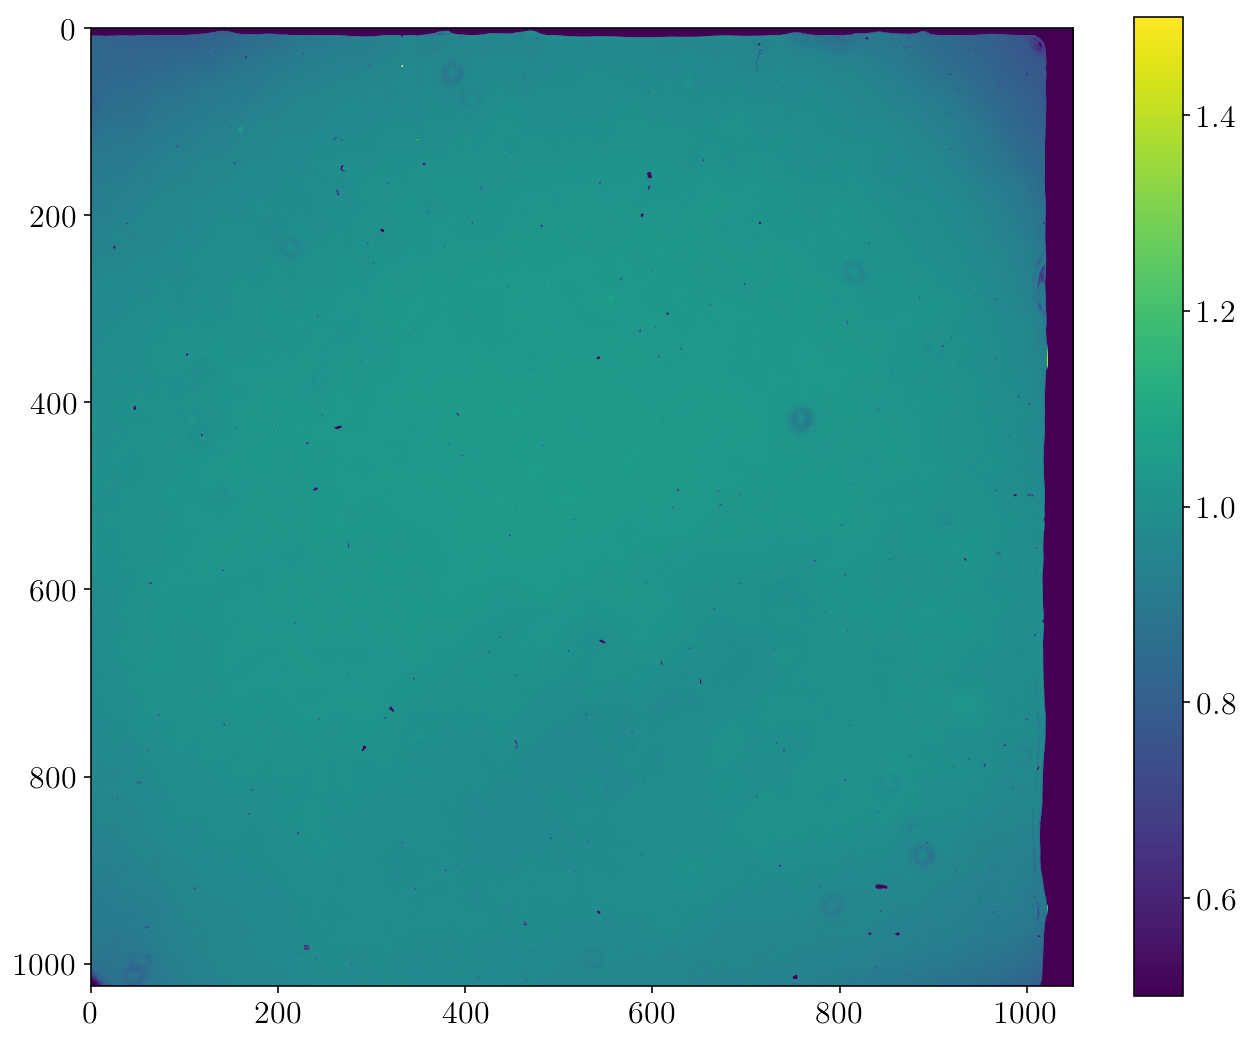

In [48]:
plt.figure(figsize=(11,9))
c1 = plt.imshow(flat_V,vmin=0.5,vmax=1.5)
plt.colorbar(c1);

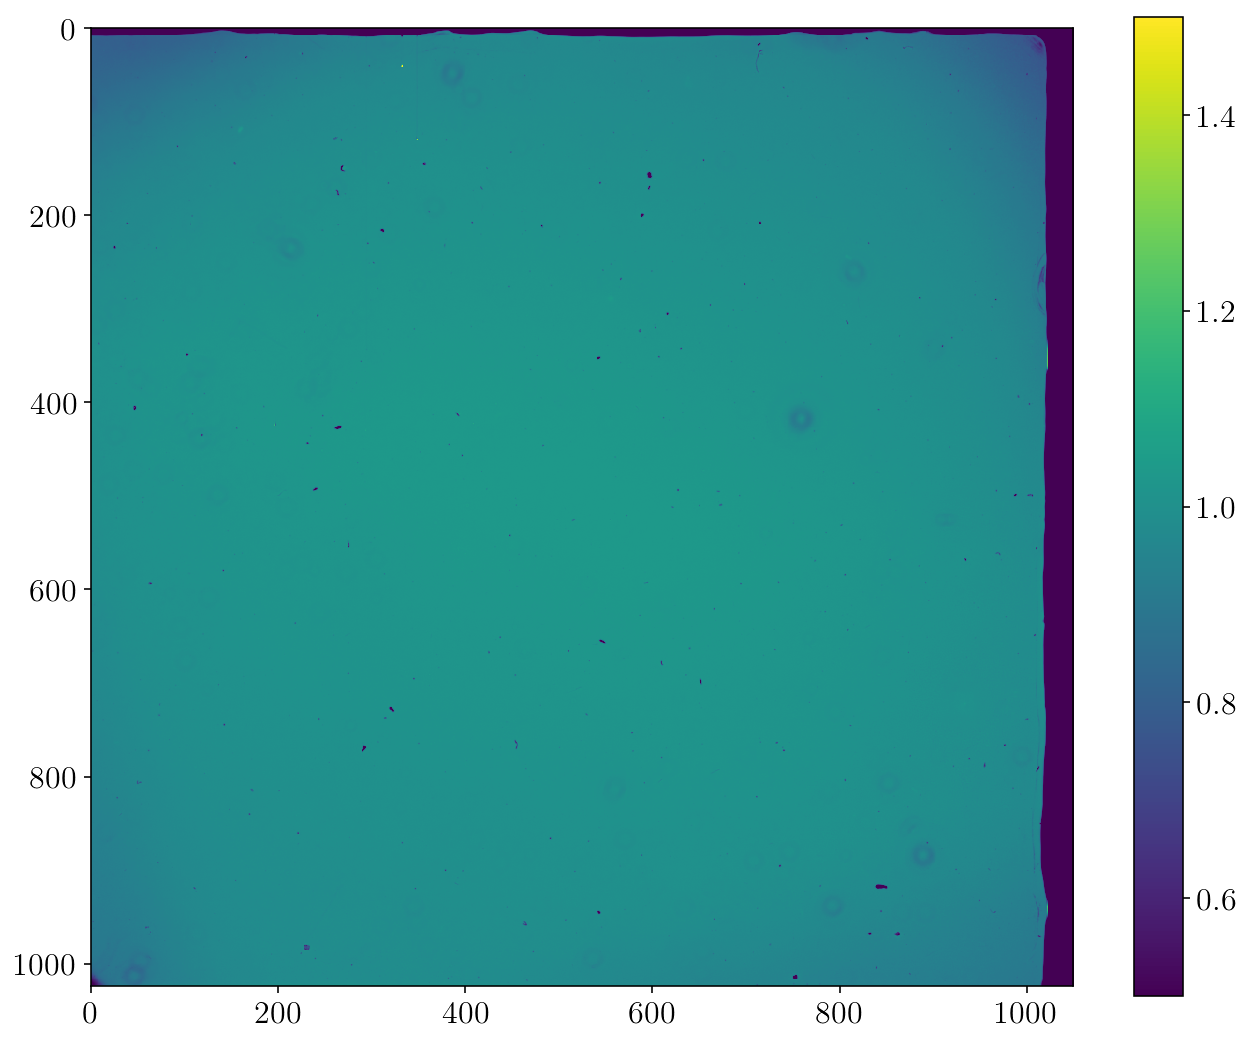

In [49]:
plt.figure(figsize=(11,9))
c1 = plt.imshow(flat_R,vmin=0.5,vmax=1.5)
plt.colorbar(c1);

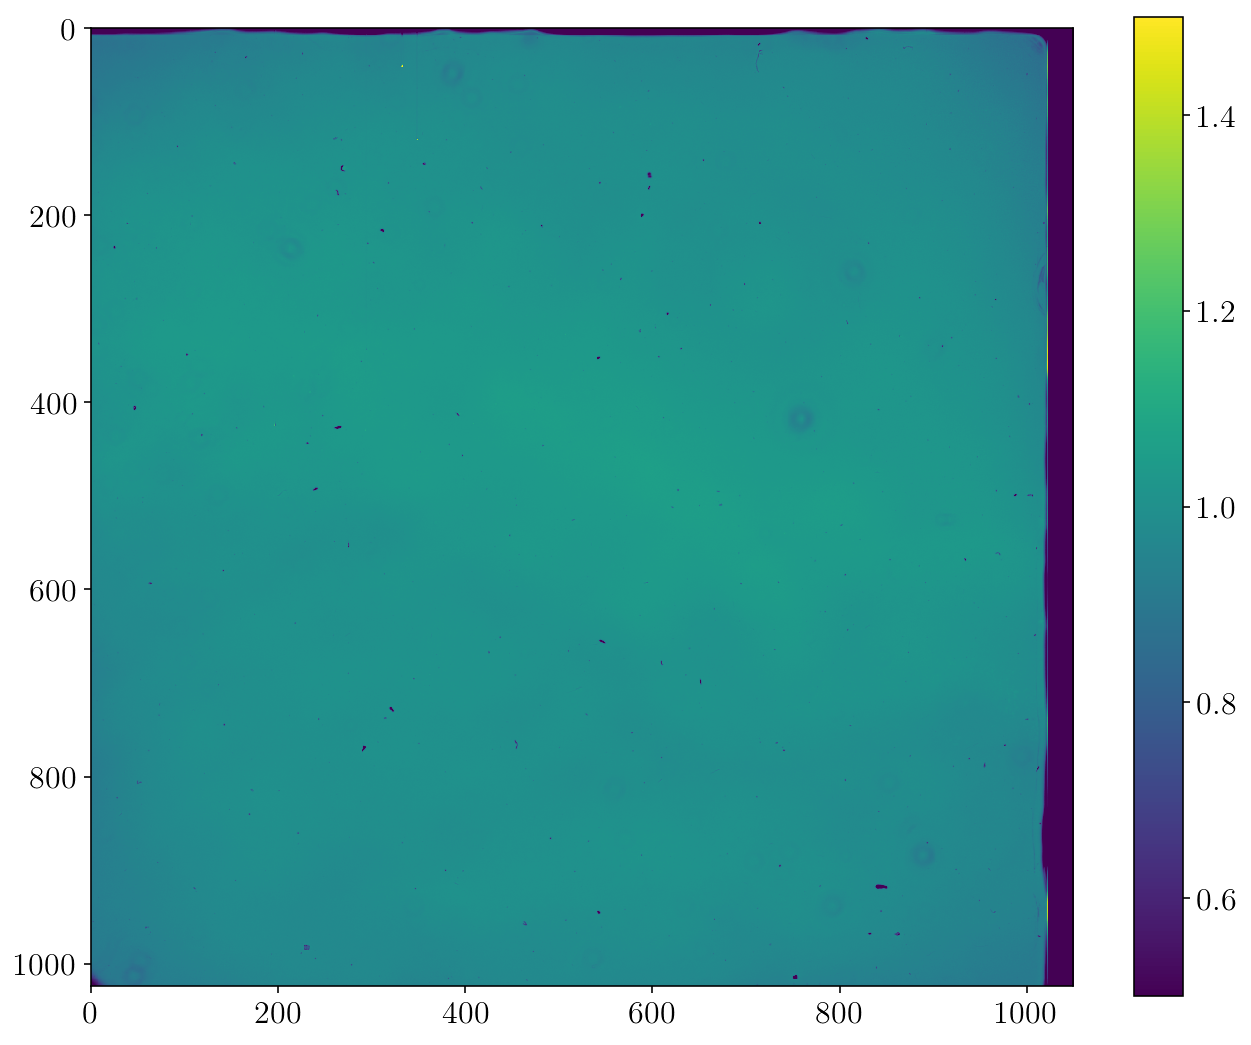

In [50]:
plt.figure(figsize=(11,9))
c1 = plt.imshow(flat_I,vmin=0.5,vmax=1.5)
plt.colorbar(c1);

In [58]:
m51_v = np.flipud(pyfits.getdata('science/wg_m51_V0002.fits')-bias)/flat_V
m51_r = np.flipud(pyfits.getdata('science/wg_m51_R0000.fits')-bias)/flat_R
m51_i = np.flipud(pyfits.getdata('science/wg_m51_I0000.fits')-bias)/flat_I

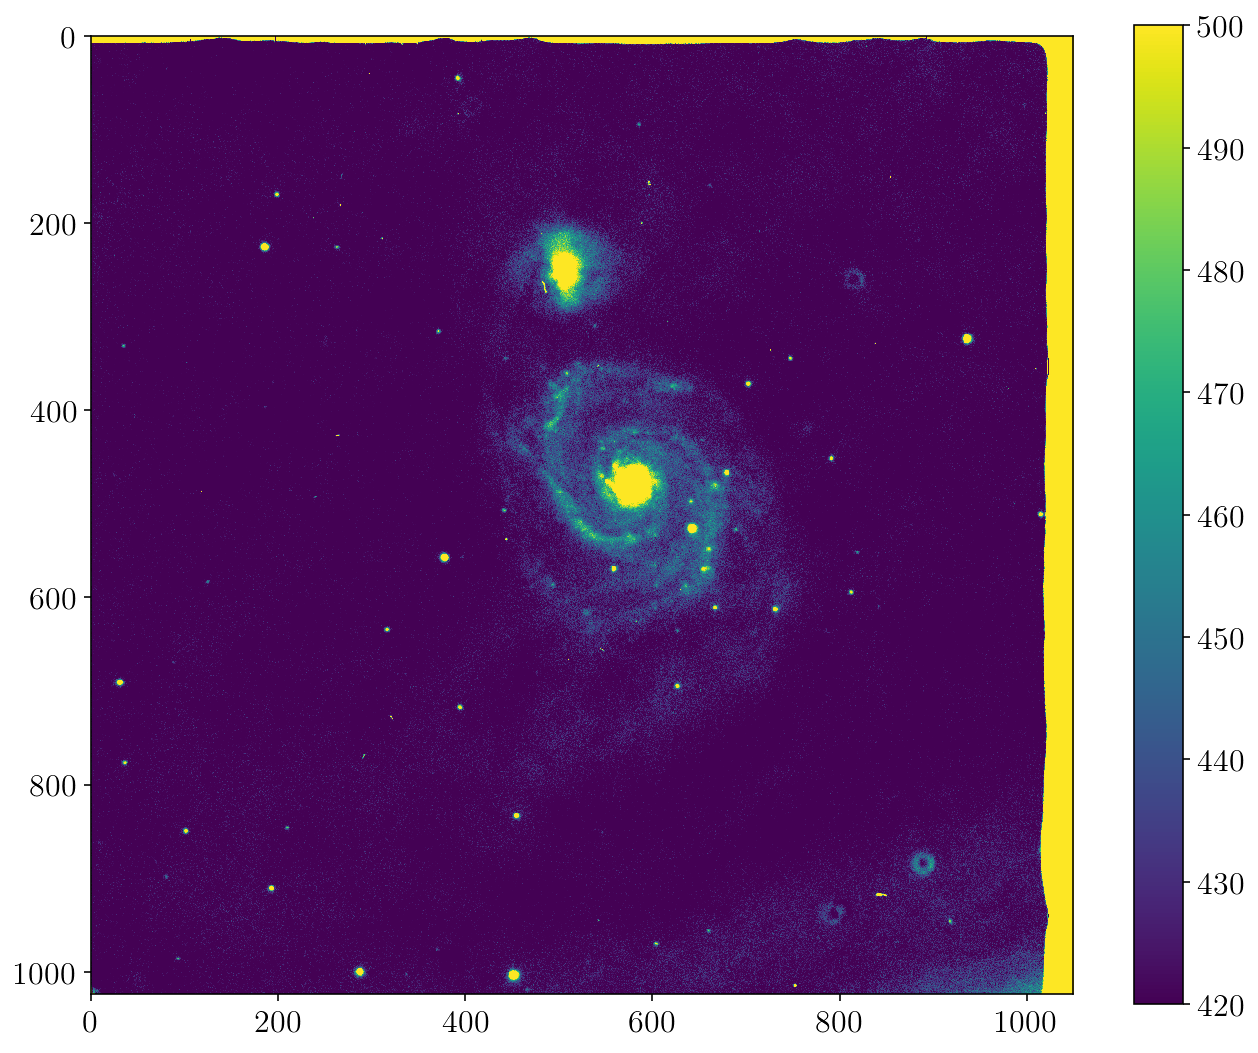

In [59]:
v_min = 420
v_max = 500

# Bias correction
v = m51_v; v[v < v_min] = v_min; v[v > v_max] = v_max

plt.figure(figsize=(11,9))
c1 = plt.imshow(v,vmin=v_min,vmax=v_max)
plt.colorbar(c1);

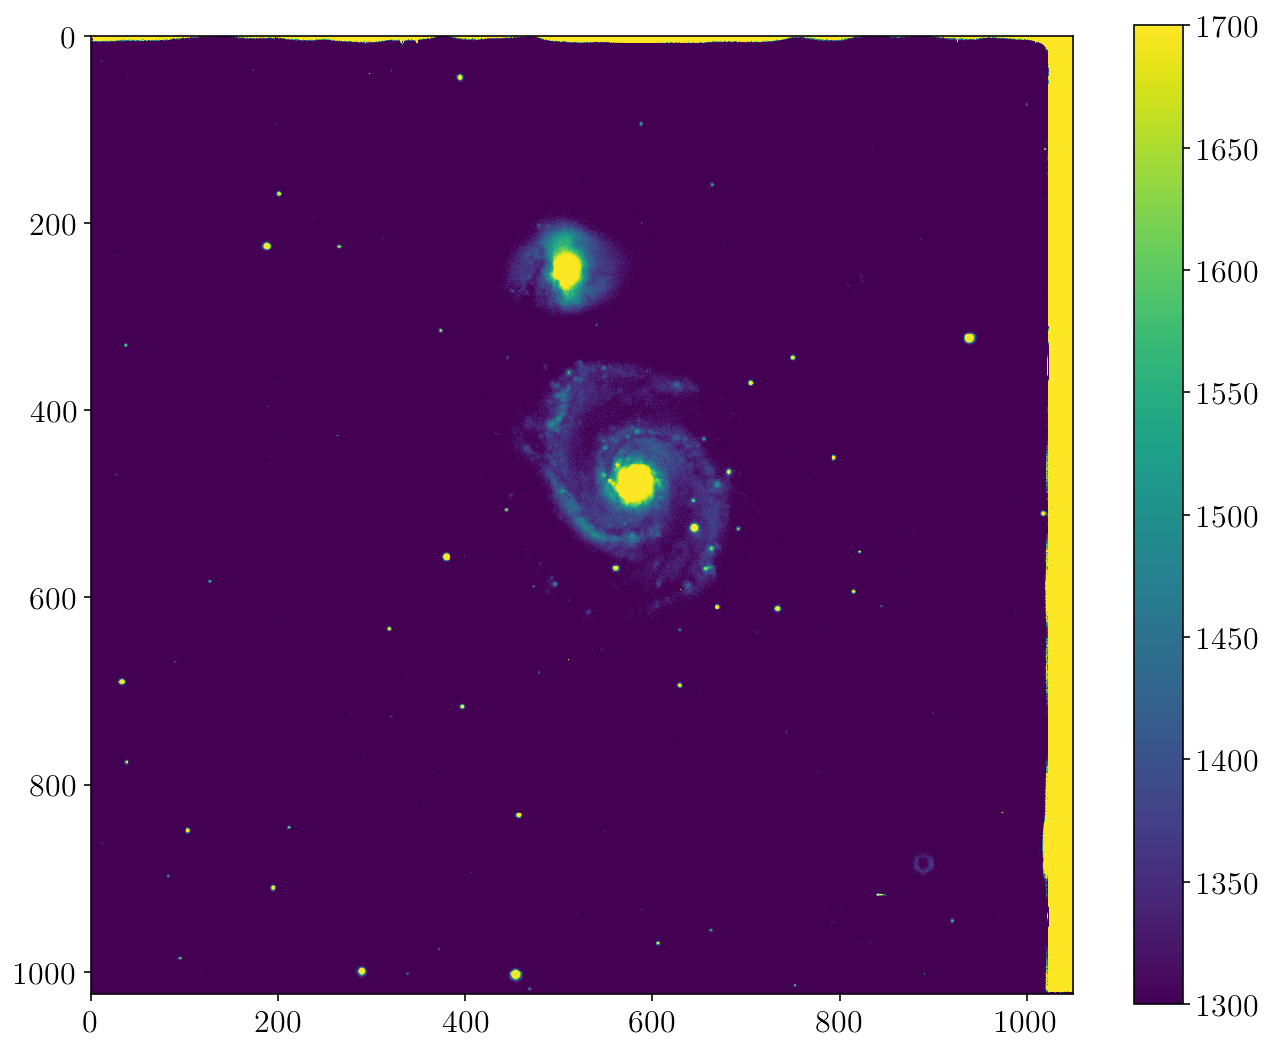

In [60]:
r_min = 1300
r_max = 1700

# Bias correction
r = m51_r ; r[r < r_min] = r_min; r[r > r_max] = r_max

plt.figure(figsize=(11,9))
c1 = plt.imshow(r,vmin=r_min,vmax=r_max)
plt.colorbar(c1);

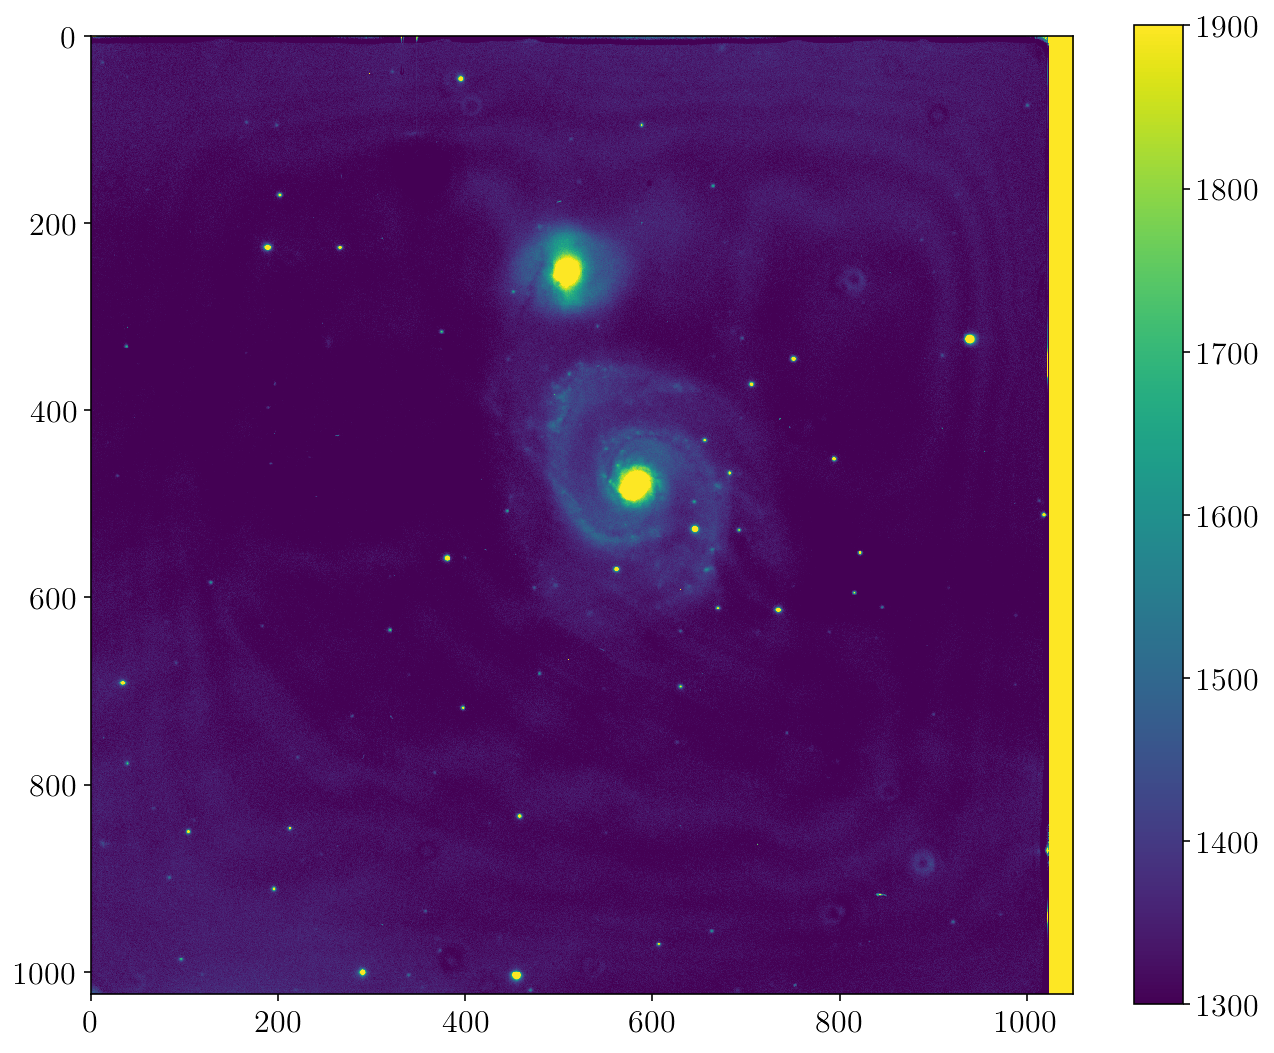

In [61]:
i_min = 1300
i_max = 1900

# Bias correction
i = m51_i ; i[i < i_min] = i_min; i[i > i_max] = i_max

plt.figure(figsize=(11,9))
c1 = plt.imshow(i,vmin=i_min,vmax=i_max)
plt.colorbar(c1);

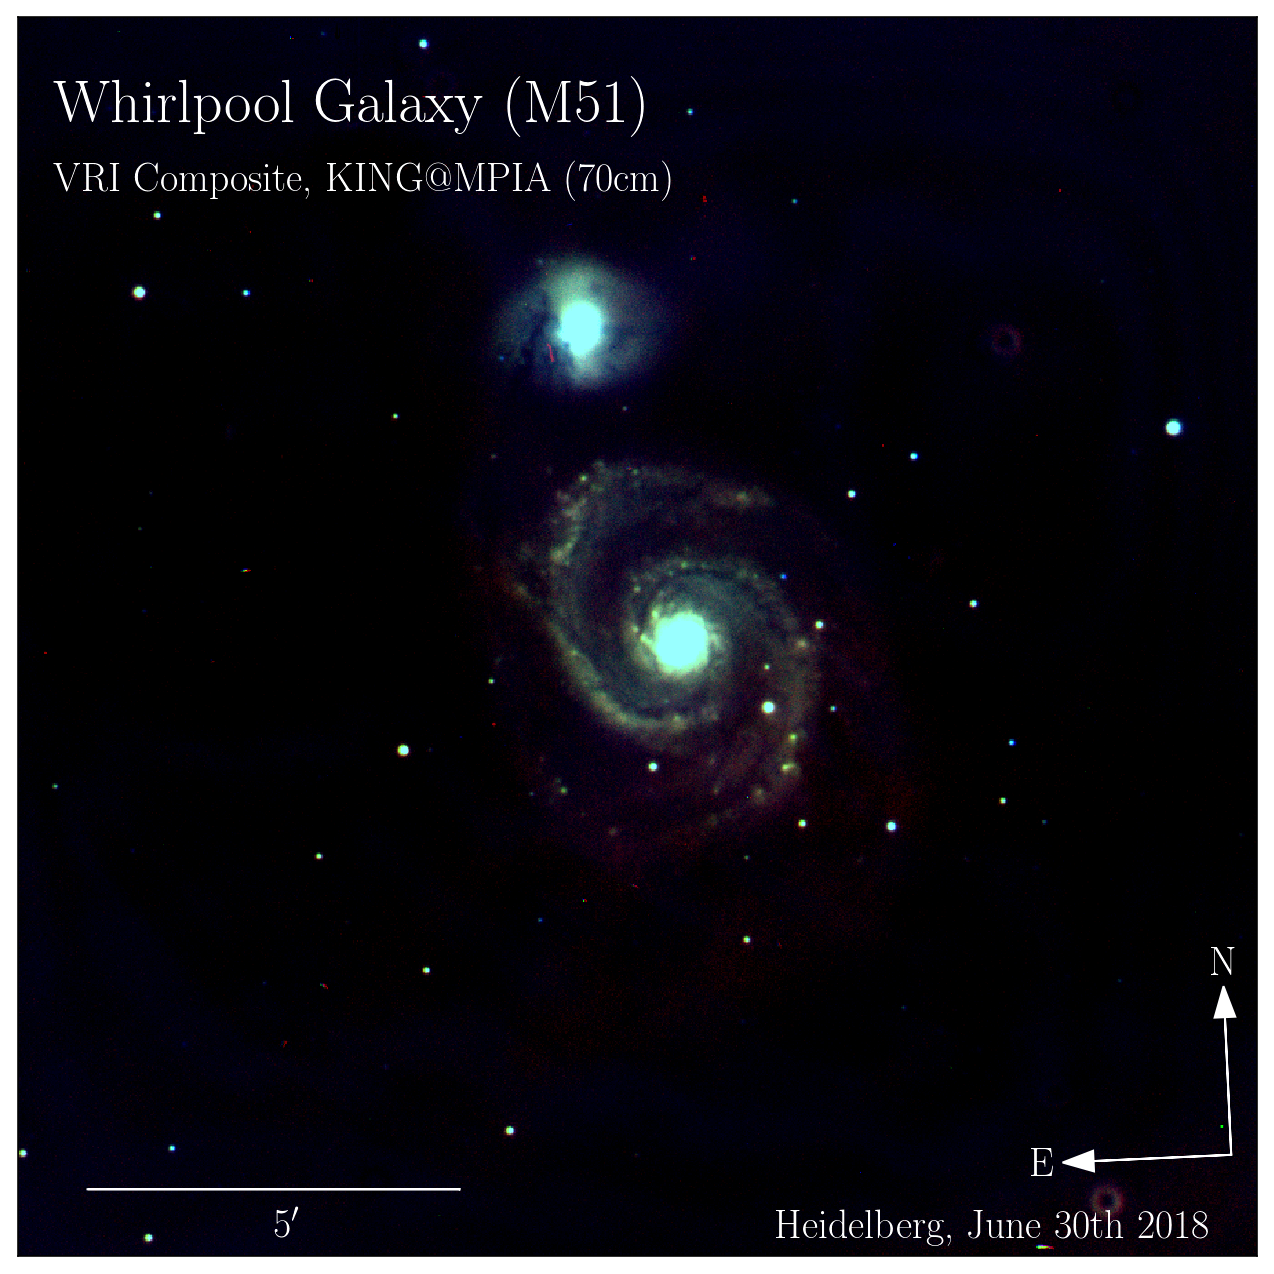

In [71]:
v_img = (v-v_min)/(v_max-v_min)*0.6
r_img = (r-r_min)/(r_max-r_min)*1.1
i_img = (i-i_min)/(i_max-i_min)*1.1

top = 25
bottom = 1024-100
left = 100
right = 1024-25

plt.figure(figsize=(11,9))
img = np.zeros((bottom-top, right-left, 3), dtype=float)
img[:,:,0] = v_img[top:bottom,left-2:right-2]
img[:,:,1] = r_img[top:bottom,left:right]
img[:,:,2] = i_img[top+1:bottom+1,left:right]
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.arrow(50,850,5*60/1.11,0,color='w');
plt.text(50+5*60/1.11/2.,885,r'$5^\prime$',color='w',fontsize=20);
plt.text(25,75,'Whirlpool Galaxy (M51)',color='w',fontsize=30);
plt.text(25,125,'VRI Composite, KING@MPIA (70cm)',color='w',fontsize=20);
plt.text(550,885,'Heidelberg, June 30th 2018',color='w',fontsize=20);
plt.text(865,695,'N',color='w',fontsize=20);
plt.text(735,840,'E',color='w',fontsize=20);
plt.tight_layout()
plt.arrow(880,825,100*np.cos((-90-2.61)*np.pi/180.),100*np.sin((-90-2.61)*np.pi/180.),color='w',shape='full',head_width=15);
plt.arrow(880,825,100*np.cos((-180-2.61)*np.pi/180.),100*np.sin((-180-2.61)*np.pi/180.),color='w',shape='full',head_width=15);
plt.savefig('WG_M51.png',bbox_inches=0.,pad_inches=0.,dpi=300) 